### Ejercicio 1

En clase vimos que la función `bits` permite ver la representación binaria de números de punto flotante (`Float64`) o de enteros (e.g., `Int64`). En particular, para números de punto flotante, el primer bit es el signo, los siguiente 11 son el *exponente* y el resto es la representación binaria (sin el 1 del principio), del número en cuestión.

La pregunta es ¿qué significa el exponente?

```julia
bits(0.1)
"0111111111110000000000000000000000000000000000000000000000000000"
```

In [31]:
bits(0.1)

"0011111110111001100110011001100110011001100110011001100110011010"

la potencia de $2^n$ tal que $n \in \mathbb{Z}$ sea una expansión en terminos de potencias de 2 del número en cuestion. Es como la notación científica en base 10, sólo que ahor es en base 2, y hacemos la expansión no en términos de $10^n$ sino que en 2, por ejemplo en base 10, para representar el número $1/3$ tenemos la suma
$$
1/3 = \sum_{n=1}^{\infty} 3 \cdot 10^{-n} = 0.333333333\dots
$$
pero la computadora no puede ententer este tipo de expansiones, ya que no entiende de números recursivos, si nos pasamos a base 2

In [34]:
bits(1/3)

"0011111111010101010101010101010101010101010101010101010101010101"

También sucede que aparece un número recursivo, los primeros 11 números significan el valor de $n$ en la expansión en base 2, tal que el número se pueda expresar lo más cercanamente posible al número real, pero hay que recordar que hay un error por truncamiento, ya que la serie no puede ser infinita.

Las consultas rápidas que hice para entender lo que sucedía:


https://youtu.be/PZRI1IfStY0 (Estoy suscrito)


https://en.wikipedia.org/wiki/Double-precision_floating-point_format (Soy honesto)

### Ejercicio 2

- ¿Cuál es el número más chico que sumado (o restado) a 1.0 me da algo distinto de 1.0?
(Este número se bautiza como el "épsilon de la máquina")

- ¿Cuál es el número más chico que sumado (o restado) a 10.0 me da algo distinto de 10.0?


     La primera pregunta
     
Lo pienso alreves, va evaluando las potencias de 10 desde -1000 hasta 0, en pasos de 0.00001, cuando la diferencia a es distinta a 1, le mando a imprimir el valor de la épsilon que es 10 a la potencia donde se detuvo y luego le digo que me imprima la potencia en donde se detuvo, es decir el número de índice dónde se quedó.
     
     La segunda pregunta
     
Hago lo mismo que en la primera sólo varío en donde corresponda, el 10 en la seguda línea y en el agumento del if.

Lo que noté es que la $\epsilon$ se va refinando conforme el paso se va haciendo más chico, aunque no cambia el orden de magnitud de la misma.

En estos ejercicios quizá deban perdonar mis códigos, estoy un poco oxidado en julia.

In [35]:
for i in 0:0.00001:1000   #First question
    a= 1.0-10.0^(-1000+i) #Veo qué le hace un número lo suficientente pequeño al ser restado de 1
    if(a != 1.0)  #Si le hizo algo, ie. identifica al resultado distinto de uno
        println(10.0^(-1000+i))  #imprime el valor que hizo el cambio
        println(i)  #e imprime el valor del índice al cual se dió el cambio.
        break
    end
end

5.55123995085631e-17
983.74439


In [36]:
for i in 0:0.00001:1000 #Second question
    a= 10.0-10.0^(-1000+i)  #lo mismo que el ejercicio anterior, solo que ahora se le resta a 10 en vez de a 1.
    if(a != 10.0)
        println(10.0^(-1000+i))
        println(i)
        break
    end
end

8.88198427608497e-16
984.94851


### Ejercicio 3

Define una functión llamada `derivada1` que implemente el cálculo de:

$$
\frac{\Delta f(x)}{\Delta x}(x_0) = \frac{f(x_0+h)-f(x_0)}{h}
$$

Obviamente esta función es una aproximación *finita* de la derivada. La pregunta es ¿qué tan buena es esta aproximación, pensando en términos de $h$?

- La primer sub-pregunta es ¿cómo se responde este tipo de pregunta?
- Uno tiene que tomar un caso concreto (para $f(x_0,h)$); sugiero empezar con un polinomio con coeficientes enteros, y después hacer el mismo tipo de pruebas con una función trascendental.
- ¿Hay algo *sorprendente* en el comportamiento de `derivada1` como función de $h$? ¿A qué lo puedes atribuir?
- ¿Puedes hacer que la función `derivada1` funcione para funciones más o menos arbitrarias, que el usuario define?
- ¿Puedes explicar de alguna manera los resultados que has obtenido?

Reordenando la expresión de la derivada
$$
h \frac{\Delta f(x_o)}{\Delta x} (x_o)+f(x_o)=f(x_o+h)
$$
si lo vemos como una expansión de Taylor en rededor de x_o, vemos que realmente
$$
h \frac{\Delta f(x_o)}{\Delta x} (x_o)+f(x_o)=f(x_o+h)
$$
y los términos de error que nos volamos, ie. los términos subsecuentes de la serie son del orden de $h^2$, por lo que nuestro error es del orden de $h^2$.
Por lo que vi en las gráficas de abajo, es que hay momentos en donde la presición es menor, incluso aun haciendo el paso más pequeño, es más si se hace demasiado pequeño, manda el valor de la derivada a cero, quizá sea por algún tipo de error de redondeo.

lo que leí. Giordano, Nicholas J. & Nakanishi, Hisao. *Computational Physics*. Second Edition. Prearson Prentice Hall. 2006. pp 2-3

In [1]:
function derivada1(funct, x0, h) #tiene como entradas una función, un valor de x y el tamaño del paso
    (funct(x0+h)-funct(x0))/h
end

derivada1 (generic function with 1 method)

In [2]:
f(x) = x^2       #Aquí se pueden modificar las funciones a su antojo
g(x) = 2x^5-6x^4+3.3x^3+1.1x^2+7x-12.1

g (generic function with 1 method)

In [28]:
function variah1(funct,x0) #como entradas una función y un valor de x
    dat = zeros(100,2) #hago un arreglo de zeros de 2 columnas y 100 hileras
    tam = length(dat[:,1]) #mido las hileras
     
    for i in 0:tam-1    #hago correr el índice para reasignar los valores de la primera columna a los valores de la 
        dat[i+1,1]=-i   #la potencia de 10 que le meto el paso, del más grande al más chico
        dat[i+1,2]=derivada1(f,big(x0),10.0^-i) #lo hice así por que en el eje x si lo hacia directo con el tamaño del 
    end         #paso no se graficaba correctamente.
    return dat
end

variah1 (generic function with 1 method)

In [29]:
using PyPlot #Mando a llamar el paquete de graficación PyPlot

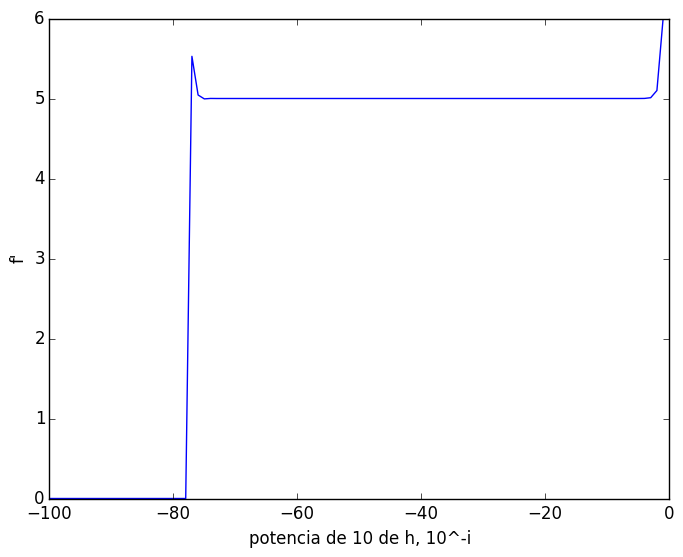

PyObject <matplotlib.text.Text object at 0x7f429e392be0>

In [43]:
k = variah1(f,2.5);  #evaluo f' en x_o=2.5
plot(k[:,1],k[:,2])  #grafico los valores.
xlabel("potencia de 10 de h, 10^-i")
ylabel("f'")

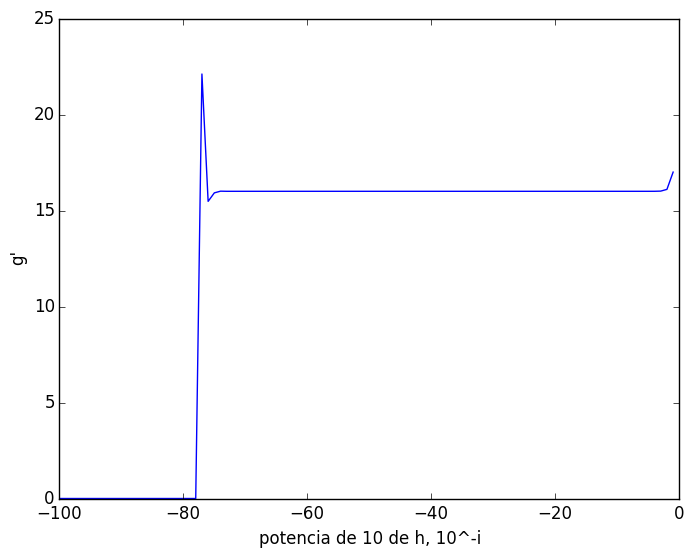

PyObject <matplotlib.text.Text object at 0x7f429e2f0fd0>

In [44]:
l=variah1(g,8) #evaluo g' en x=8
plot(l[:,1],l[:,2])
xlabel("potencia de 10 de h, 10^-i")
ylabel("g'")

### Ejercicio 4

Este ejercicio es equivalente al anterior, pero considerando la función `derivada2` que implemente el cálculo de:

$$
\frac{\Delta f(x)}{\Delta x}(x_0) = \frac{f(x_0+h)-f(x_0-h)}{2h}
$$

¿Puedes explicar por qué la convergencia es mejor en este caso?

Este término viene del promedio de la derivada en rededor de x_o, por lo que se espera que el cálculo sea más refinado al usar los valores que preceden y anteceden al punto x_o, si no mal recuerdo también hay una ventaja que proporciona el teorema del valor medio, en done el promedio de la derivada en cierto intervalo se puede sacar al hacer la cuenta con los valores extremos de dicho intervalo.

In [9]:
function derivada2(funct, x0, h)  #hago lo mismo que en el ejercicio anterior, solo cambio las operaciones necesarias.
    (funct(x0+h)-funct(x0-h))/(2*h)
end

derivada2 (generic function with 1 method)

In [37]:
function variah2(funct,x0)#es exactamente el código de arriba, salvo que ahora uso la nueva función derivada2
    dat = zeros(100,2)
    tam = length(dat[:,1])
    
    for i in 0:tam-1
        dat[i+1,1]=-i
        dat[i+1,2]=derivada2(f,big(x0),10.0^-i)
    end
    return dat
end

variah2 (generic function with 1 method)

In [38]:
m = variah2(f,2.5);
n = variah2(g,8);

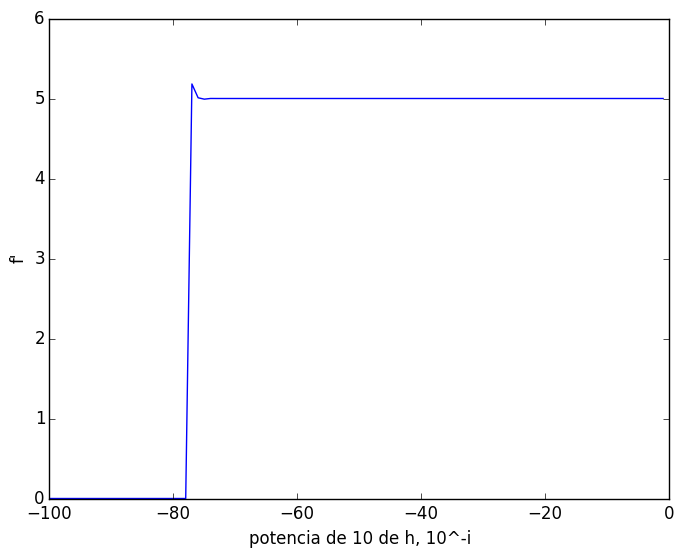

PyObject <matplotlib.text.Text object at 0x7f429e256898>

In [45]:
plot(m[:,1],m[:,2])   #la gráfica para f
xlabel("potencia de 10 de h, 10^-i")
ylabel("f'")

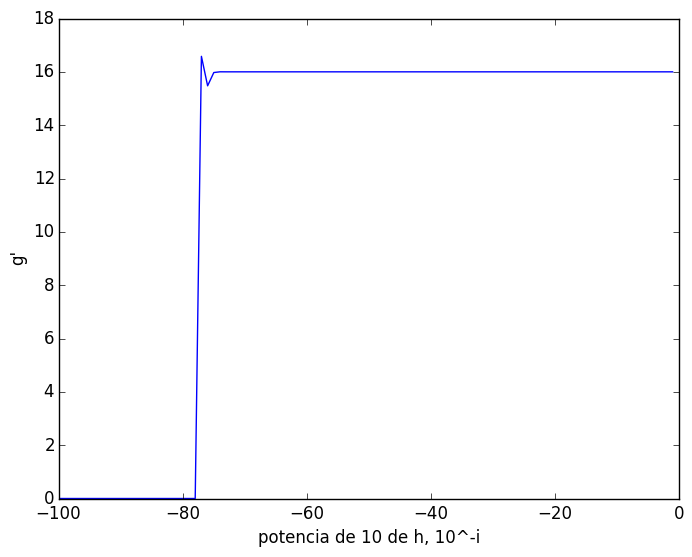

PyObject <matplotlib.text.Text object at 0x7f429e239630>

In [46]:
plot(n[:,1],n[:,2]) #la gráfica para g
xlabel("potencia de 10 de h, 10^-i")
ylabel("g'")

### Ejercicio 5

Manda el notebook con tus resultados haciendo un pull-request al repositorio del curso. Para hacer esto:
- Haz un `fork` del repositorio del curso a tu propia cuenta en GitHub
- Una vez que tengas resuelto el notebook, súbelo a **tu** repositorio (con `git push`), en la carpeta "tareas/usuario_github/nombre_notebook"
- Desde tu repositorio, haz un "Pull Request". El *pull request* sólo se aceptará si es legible en el sentido más amplio de la palabra y, obviamente, si es correcto. Esto significa que debe ser *entendible*, a partir de lo que ustedes escriben, incluso para gente que no está en el curso. (Como GitHub es público, piensen fríamente que esto puede ser leido por *muuucha* gente allá afuera.) Si el trabajo es en colaboración, háganlo saber en el propio notebook (cosa que se debe notar en el historial de lo que envíen). Finalmente, como código ético, incluyan cualquier fuente de inspiración, incluso cuando se trate del notebook de otro compañero/equipo del curso.